**NoteBook 3- Mortality Status ensemble classifier with its base learners’ performances and
Survival Months regression Decision Trees, with their graphical representation and performances.**

Name: Pahandi Samarasinghe

IIT ID: 20231228

UOW ID: w2052243

**Predicting mortality status with a voting ensemble classifier.**

Code reuse session 3 Part 1.1, 1.6, 1.8, 2.6, 2.9, 2.10

In [ ]:
# Import necessary libraries
import pandas as pd # For data handling and DataFrame operations
import numpy as np # For numerical operations and array handling
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For enhanced data visualization with statistical plots

from sklearn.model_selection import train_test_split # For splitting data
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeRegressor, plot_tree # For regression trees and tree plotting
from sklearn import metrics # Includes various performance metrics like MAE, MSE, etc.
from sklearn.metrics import (
    accuracy_score,             # Accuracy of classification
    confusion_matrix,           # Confusion matrix
    ConfusionMatrixDisplay,     # Display for confusion matrix
    classification_report,      # Precision, recall, f1-score, etc.
    roc_auc_score,              # ROC AUC score
    RocCurveDisplay             # ROC curve plot
)

Code reuse session 3 Part 1.2

In [ ]:
# Load cleaned classification dataset
data_class = pd.read_csv('/content/drive/MyDrive/ML CW/cancer_mortality_classification.csv')
print("Classification dataset shape:", data_class.shape)
data_class.head()
data_class.info()

Classification dataset shape: (3799, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3799 non-null   float64
 1   T_Stage                 3799 non-null   int64  
 2   N_Stage                 3799 non-null   int64  
 3   6th_Stage               3799 non-null   int64  
 4   Differentiated          3799 non-null   int64  
 5   Grade                   3799 non-null   int64  
 6   A_Stage                 3799 non-null   int64  
 7   Tumor_Size              3799 non-null   float64
 8   Estrogen_Status         3799 non-null   int64  
 9   Progesterone_Status     3799 non-null   int64  
 10  Regional_Node_Examined  3799 non-null   float64
 11  Regional_Node_Positive  3799 non-null   int64  
 12  Survival_Months         3799 non-null   int64  
 13  Mortality_Status        3799 non-null   int64  
dtyp

Code reuse session 3 Part 1.5

In [ ]:
# Define features and target for classification task
feature_cols_class = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                      'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
                      'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']

X_class = data_class[feature_cols_class]
y_class = data_class['Mortality_Status']

print("Features shape:", X_class.shape)
print("Target shape:", y_class.shape)

Features shape: (3799, 12)
Target shape: (3799,)


Code reuse session 3 Part 1.7

In [ ]:
# Split data for classification (stratified)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print("Training set shape:", X_train_class.shape)
print("Testing set shape:", X_test_class.shape)

Training set shape: (3039, 12)
Testing set shape: (760, 12)


In [ ]:
# Define two base learners
Classifier1 = LogisticRegression(max_iter=1000)
Classifier2 = KNeighborsClassifier()

Code reuse session 3 Part 1.9

In [ ]:
# Create Voting Classifier (soft voting)
from sklearn.ensemble import VotingClassifier
ensemble_learner = VotingClassifier(estimators=[('LR', Classifier1), ('KNN', Classifier2)], voting='soft')

Code reuse session 3 Part 1.10

In [ ]:
# Train the ensemble learner
ensemble_learner.fit(X_train_class, y_train_class)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=1000)),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

Code reuse session 3 Part 1.11

In [ ]:
# Predictions
y_pred_ensemble = ensemble_learner.predict(X_test_class)
y_proba_ensemble = ensemble_learner.predict_proba(X_test_class)[:, 1]

Code reuse session 3 Part 1.12

In [ ]:
# Accuracy
ensemble_accuracy = accuracy_score(y_test_class, y_pred_ensemble)
print("Voting Ensemble Classifier Accuracy:", ensemble_accuracy)

Voting Ensemble Classifier Accuracy: 0.8565789473684211


Code reuse session 3 Part 1.13

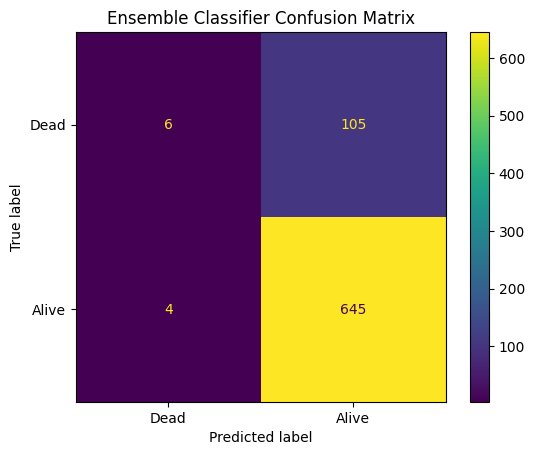

In [ ]:
# Confusion Matrix
ensemble_cm = confusion_matrix(y_test_class, y_pred_ensemble)
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm, display_labels=['Dead', 'Alive'])
ensemble_disp.plot()
plt.title("Ensemble Classifier Confusion Matrix")
plt.show()

Code reuse session 3 Part 1.14

In [ ]:
# Classification Report
print("Classification Report for Ensemble Learner:\n", classification_report(y_test_class, y_pred_ensemble))

Classification Report for Ensemble Learner:
               precision    recall  f1-score   support

           0       0.60      0.05      0.10       111
           1       0.86      0.99      0.92       649

    accuracy                           0.86       760
   macro avg       0.73      0.52      0.51       760
weighted avg       0.82      0.86      0.80       760



Code reuse session 3 Part 15

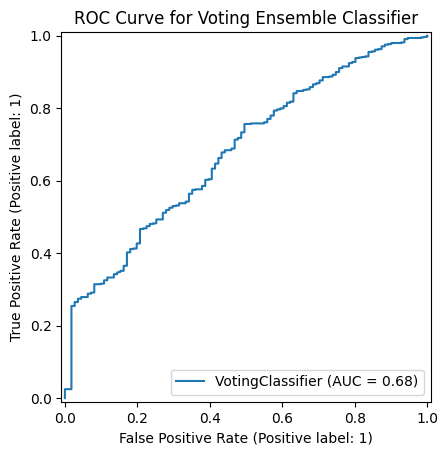

In [ ]:
# ROC Curve
RocCurveDisplay.from_estimator(ensemble_learner, X_test_class, y_test_class)
plt.title("ROC Curve for Voting Ensemble Classifier")
plt.show()

**Predicting cancer patients survival months with a regression decision tree.**

Code reuse session 3 Part 2.2

In [ ]:
# Load cleaned regression dataset
data_reg = pd.read_csv('/content/drive/MyDrive/ML CW/cancer_survival_regression.csv')
print("Regression dataset shape:", data_reg.shape)
data_reg.head()

Regression dataset shape: (3799, 13)


,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months
0,68.0,0,0,0,0,3,0,4.0,1,1,24.0,1,60
1,50.0,1,1,1,1,2,0,35.0,1,1,14.0,5,62
2,58.0,2,2,4,1,2,0,63.0,1,1,14.0,7,75
3,58.0,0,0,0,0,3,0,18.0,1,1,2.0,1,84
4,47.0,1,0,2,0,3,0,41.0,1,1,3.0,1,50


Code reuse session 3 Part 2.4

In [ ]:
# Define features and target for regression task
feature_cols_reg = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                      'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
                      'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']
X_reg = data_reg[feature_cols_reg]
y_reg = data_reg['Survival_Months']

In [ ]:
print("Features shape (regression):", X_reg.shape)
print("Target shape (regression):", y_reg.shape)

Features shape (regression): (3799, 12)
Target shape (regression): (3799,)


Code reuse session 3 Part 2.5

In [ ]:
# Split regression data into train and test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape (regression):", X_train_reg.shape)
print("Testing set shape (regression):", X_test_reg.shape)

Training set shape (regression): (3039, 12)
Testing set shape (regression): (760, 12)


Code reuse session 3 Part 2.7

In [ ]:
# Fully Grown Decision Tree Regressor
dt_full = DecisionTreeRegressor(random_state=42)
dt_full.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

Code reuse session 3 Part 2.8

In [ ]:
# Predictions
y_pred_full = dt_full.predict(X_test_reg)

Code reuse session 3 Part 2.9

In [ ]:
# Evaluation Metrics
print("Fully Grown Tree Metrics:")
print("MAE:", metrics.mean_absolute_error(y_test_reg, y_pred_full))
print("MSE:", metrics.mean_squared_error(y_test_reg, y_pred_full))
print("R2 Score:", metrics.r2_score(y_test_reg, y_pred_full))

Fully Grown Tree Metrics:
MAE: 26.12236842105263
MSE: 1064.691447368421
R2 Score: -1.0495792069730792


Code reuse session 3 Part 2.11

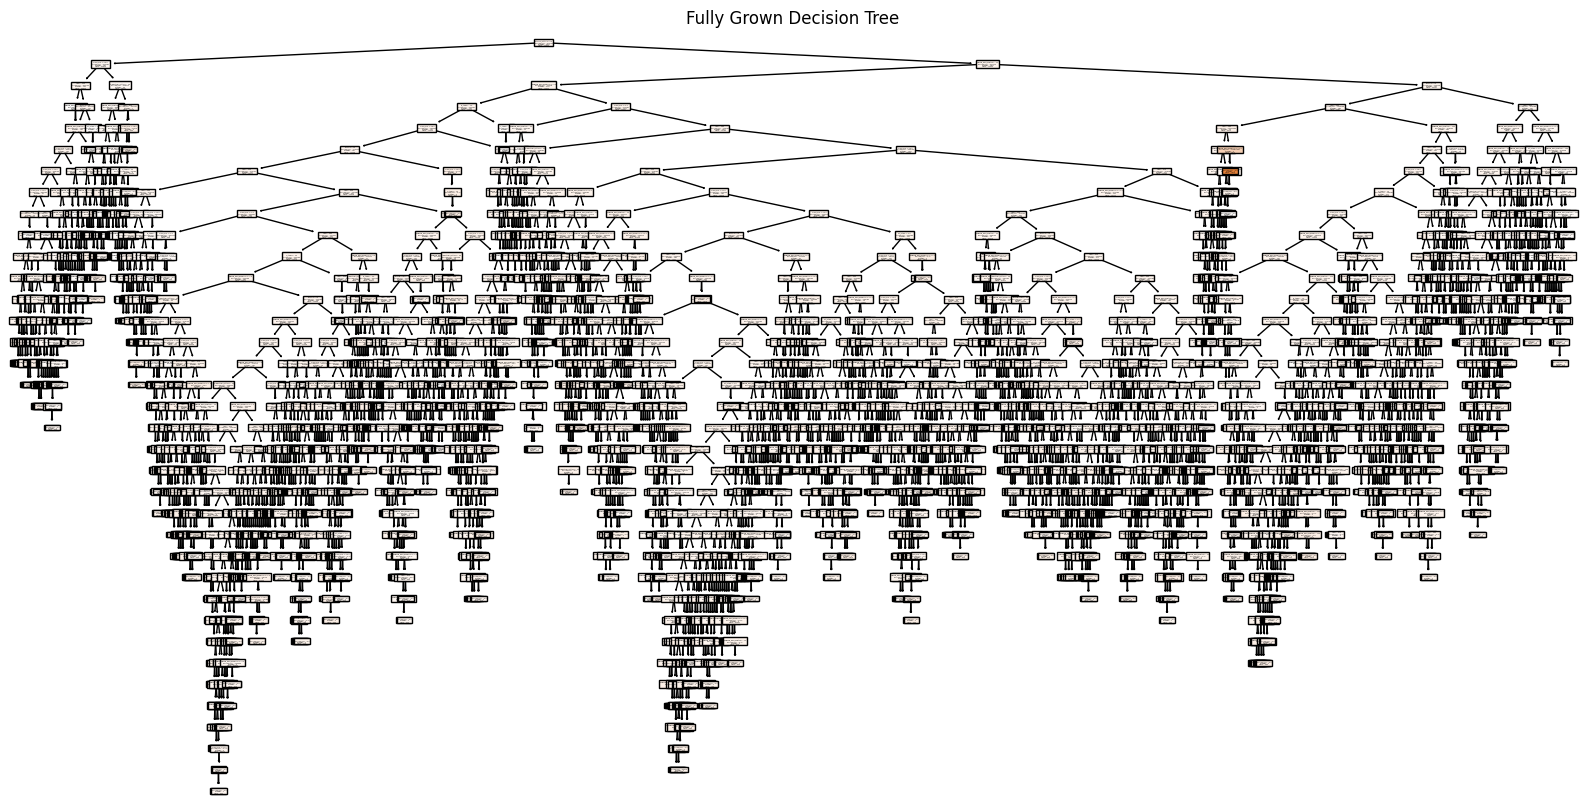

In [ ]:
# Plot the full decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_full, feature_names=feature_cols_reg, filled=True)
plt.title("Fully Grown Decision Tree")
plt.show()

Code reuse session 3 Part 2.13

In [ ]:
# Pruned Decision Tree Regressor (max_depth=4)
dt_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_pruned.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=4, random_state=42)

Code reuse session 3 Part 2.8

In [ ]:
# Predictions
y_pred_pruned = dt_pruned.predict(X_test_reg)

Code reuse session 3 Part 2.9

In [ ]:
# Evaluation Metrics
print("Pruned Tree Metrics:")
print("MAE:", metrics.mean_absolute_error(y_test_reg, y_pred_pruned))
print("MSE:", metrics.mean_squared_error(y_test_reg, y_pred_pruned))
print("R2 Score:", metrics.r2_score(y_test_reg, y_pred_pruned))

Pruned Tree Metrics:
MAE: 18.692847022138764
MSE: 535.7446790552486
R2 Score: -0.03133274635777061


Code reuse session 3 Part 2.11

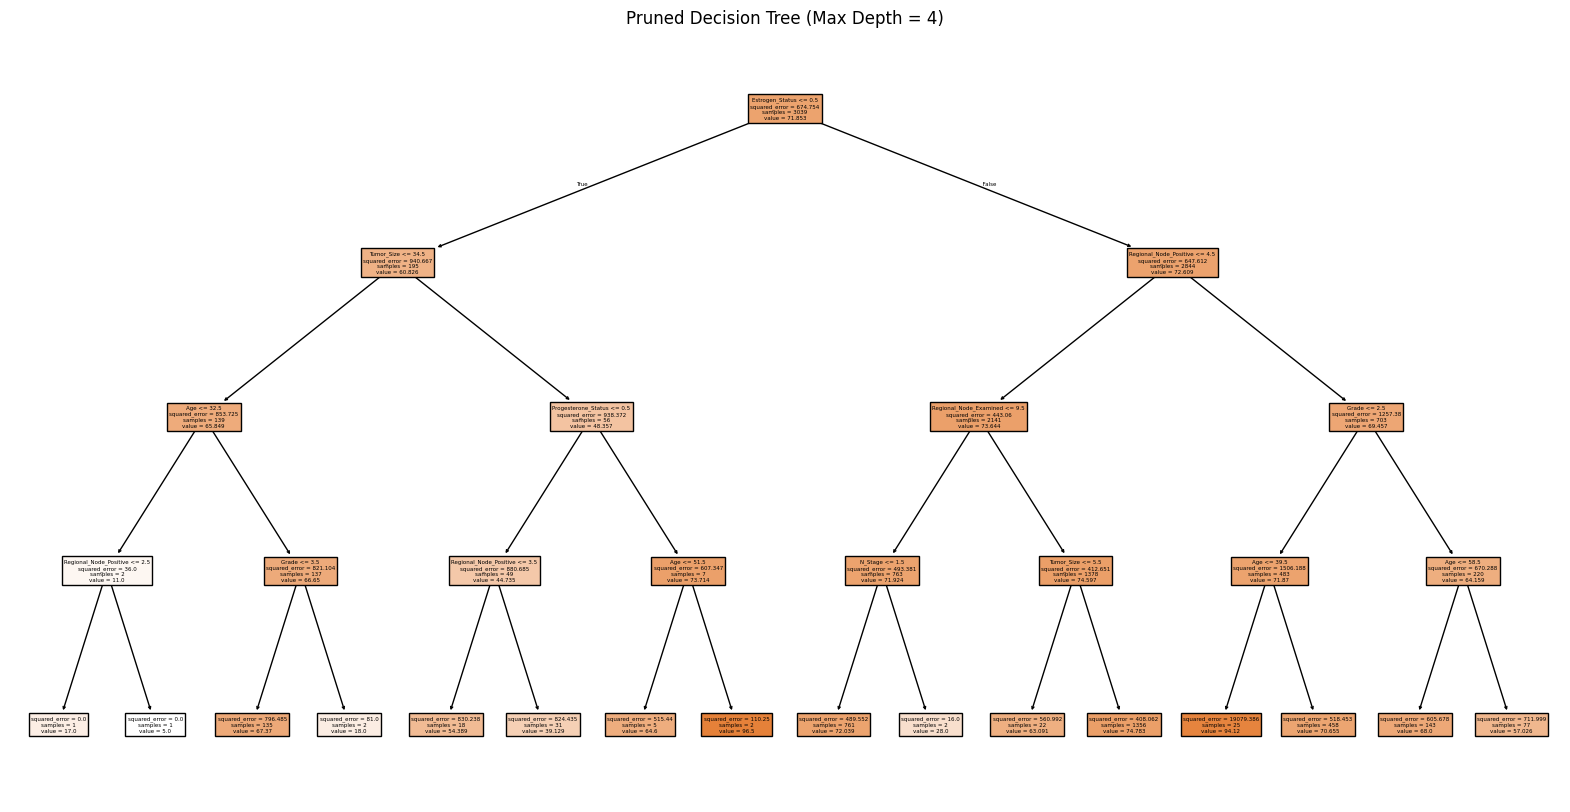

In [ ]:
# Plot the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_pruned, feature_names=feature_cols_reg, filled=True)
plt.title("Pruned Decision Tree (Max Depth = 4)")
plt.show()

In [ ]:
# Create a new DataFrame with data for a single patient (e.g., patient B002565)
patient_data = pd.DataFrame([{
    'Age': 29,
    'T_Stage': 2,                       # T3
    'N_Stage': 0,                       # N1
    '6th_Stage': 4,                     # IIIC
    'Differentiated': 1,               # Moderately differentiated
    'Grade': 2,
    'A_Stage': 0,                       # Regional
    'Tumor_Size': 41,
    'Estrogen_Status': 0,              # Negative
    'Progesterone_Status': 1,          # Positive
    'Regional_Node_Examined': 5,
    'Regional_Node_Positive': 1
}])

predicted_months = dt_pruned.predict(patient_data) # Use the trained and pruned decision tree model to predict survival time (in months)
print(f"Predicted survival months for patient B002565: {predicted_months[0]:.0f}") # Print the predicted survival time, rounded to the nearest whole number

Predicted survival months for patient B002565: 65
